# Applied Time Series: Lab Session 2
## Predicting Earnings Per Share

**Objective:** Predicting quarterly earnings of a large company using time series methods

**Datafiles from Ruey Tsay's webpage:**
1. *jnj_earnings.mat* contains quarterly earnings of Johnson&Johnson over the period 1960-1980.
2. *fdx_earnings.mat* contains quarterly earnings of Fedex over 1991-2006.

**Instructions:**
1. Use the *jnj_earnings.mat* file. Focus on the first $76$ observations of the series.
        a. Analyze the plot, acf/pacf of the earnings series.
        b. Calculate the augmented Dickey-Fuller test.
        c. Which data transformations are necessary to analyze the series using simple ARMA methods?
        d. Construct predictions of the transformed series for the next 4 quarters.
        e. Construct predictions of the original series for the next 4 quarters. Compare them with the actual values. What is the RMSE, MAE?
2. Use the *fdx_earnings.mat* file. Apply a-e to this series.
3. Do time series predictions seem useful in this context? Conclude.

Check stationarity, seasonality and serial dependance before running the box jenkins approach

In [1]:
#===============================================================================
# Libraries
#===============================================================================

# data library
import pandas as pd
import numpy as np
from itertools import product
from statsmodels.api import tsa
import statsmodels.api as sm
import scipy.io as sio

# plotting library
from matplotlib import pyplot as plt

<Axes: >

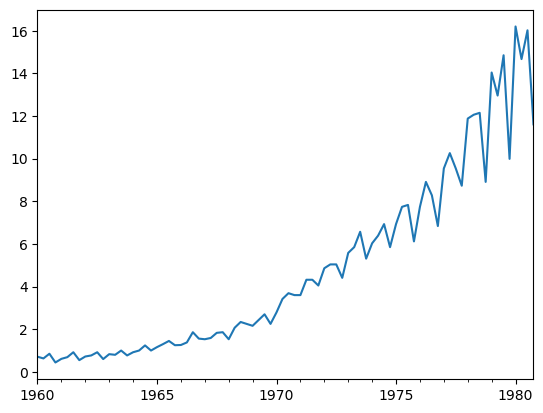

In [2]:
#===========================================================================
# load data jnj_earnings.mat
#===========================================================================

path = 'C:/Users/sbenoit/Dropbox/Dauphine-SDFi/Annees_21-22/FinancialDataAndSystemicRisk/MyCodes/Lecture9_WrapUp'
file_name = path + '/jnj_earnings.mat'
data = sio.loadmat(file_name)
T=84
T_in = 80
jnj=   pd.Series(np.ravel(data['q_eps_jnj']),index=pd.date_range('1/1/1960',freq = 'Q', periods=T))
jnj.plot()

<Axes: >

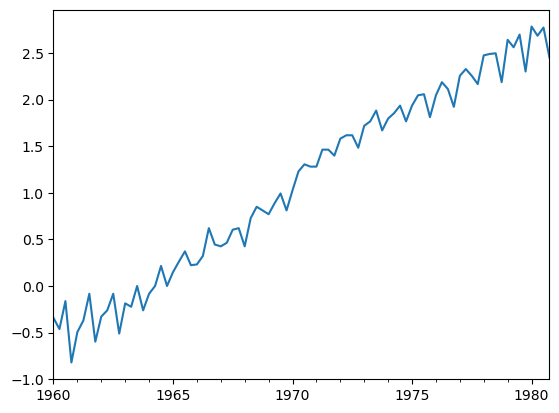

In [3]:
l_jnj = jnj.apply(np.log)
l_jnj.plot()

In [4]:
type(l_jnj)

pandas.core.series.Series

In [5]:
l_jnj.size

84

In [6]:
l_jnj

1960-03-31   -0.342490
1960-06-30   -0.462035
1960-09-30   -0.162519
1960-12-31   -0.820981
1961-03-31   -0.494296
                ...   
1979-12-31    2.301585
1980-03-31    2.785011
1980-06-30    2.685805
1980-09-30    2.773838
1980-12-31    2.451867
Freq: Q-DEC, Length: 84, dtype: float64

In [7]:
T_in

80

In [8]:
l_jnj_in = pd.Series(l_jnj[:T_in], index=pd.date_range('04/01/1960',freq = 'Q', periods=T_in-1))

In [9]:
l_jnj_in

1960-06-30   -0.462035
1960-09-30   -0.162519
1960-12-31   -0.820981
1961-03-31   -0.494296
1961-06-30   -0.371064
                ...   
1978-12-31    2.187174
1979-03-31    2.641910
1979-06-30    2.561868
1979-09-30    2.698000
1979-12-31    2.301585
Freq: Q-DEC, Length: 79, dtype: float64

In [10]:
sm.tsa.stattools.adfuller(l_jnj_in, regression='n', autolag='BIC', store=False, regresults=True)

(1.051636325852624,
 0.9228681967967884,
 {'1%': -2.597048012760368,
  '5%': -1.9452306413344405,
  '10%': -1.6136257323972987},
 <statsmodels.stats.diagnostic.ResultsStore at 0x17f7ceb4460>)

In [11]:
sm.tsa.stattools.adfuller(l_jnj_in, regression='c', autolag='BIC', store=False, regresults=True)

(-0.46392795502399814,
 0.8988655819407184,
 {'1%': -3.520713130074074,
  '5%': -2.9009249540740742,
  '10%': -2.5877813777777776},
 <statsmodels.stats.diagnostic.ResultsStore at 0x17f03a2d7e0>)

In [12]:
sm.tsa.stattools.adfuller(l_jnj_in, regression='ct', autolag='BIC', store=False, regresults=True)

(-1.0380057153946303,
 0.938777493556034,
 {'1%': -4.084849863703703,
  '5%': -3.4707426198518516,
  '10%': -3.1622754933333335},
 <statsmodels.stats.diagnostic.ResultsStore at 0x17f0542bfa0>)

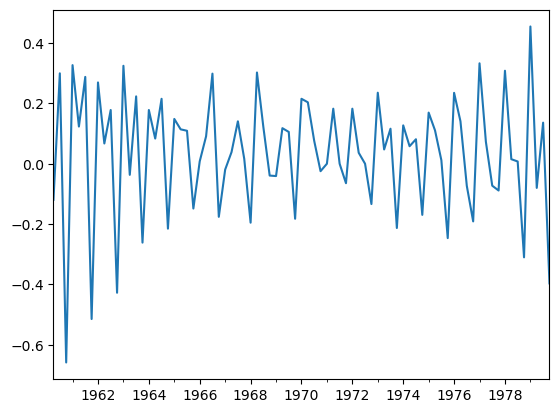

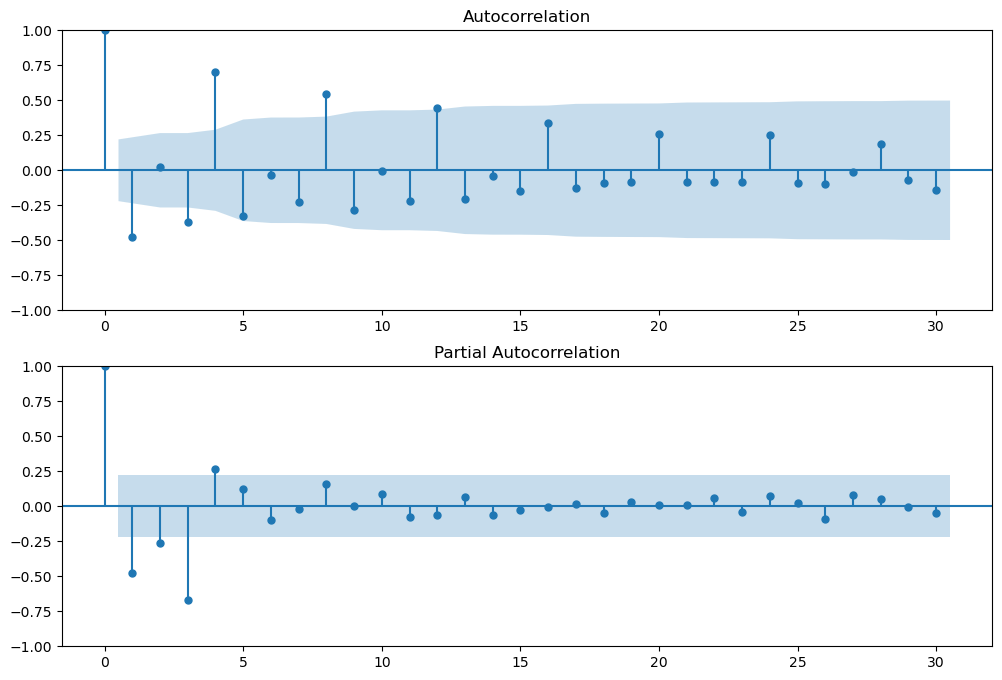

In [13]:
dl_jnj = np.diff(l_jnj)
    
dl_jnj_in = pd.Series(dl_jnj[:79],index=pd.date_range('04/01/1960',freq = 'Q', periods=T_in-1))
dl_jnj_in.plot()
    
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dl_jnj_in, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dl_jnj_in, lags=30, ax=ax2, method='ywm')

In [30]:
dl_jnj

array([-0.11954515,  0.29951653, -0.65846162,  0.32668423,  0.12323264,
        0.28768207, -0.51445539,  0.26933293,  0.0671393 ,  0.17798316,
       -0.42744401,  0.32449605, -0.03681397,  0.22314355, -0.26136476,
        0.17798316,  0.08338161,  0.21511138, -0.21511138,  0.14842001,
        0.11394426,  0.10919929, -0.14842001,  0.00796817,  0.09097178,
        0.29849299, -0.17589067, -0.01941809,  0.03846628,  0.14058195,
        0.01626052, -0.19530875,  0.30228087,  0.12260232, -0.03922071,
       -0.04082199,  0.11778304,  0.10536052, -0.18232156,  0.21511138,
        0.20359896,  0.07598591, -0.02469261,  0.        ,  0.18232156,
        0.        , -0.06453852,  0.18232156,  0.03636764,  0.        ,
       -0.13353139,  0.23531409,  0.04725288,  0.11607217, -0.212922  ,
        0.12715518,  0.05798726,  0.08112554, -0.16941815,  0.16941815,
        0.11054187,  0.01156082, -0.24640041,  0.23483959,  0.14077255,
       -0.07333127, -0.19105524,  0.33270575,  0.07275935, -0.07

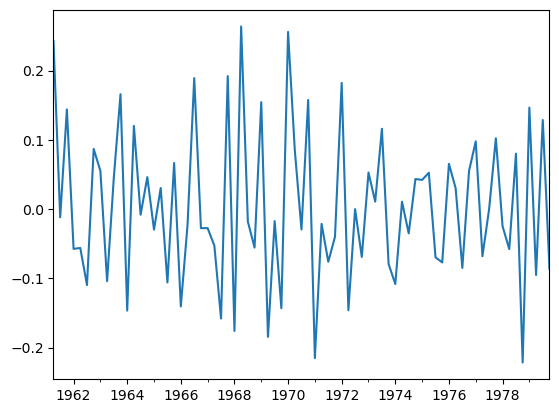

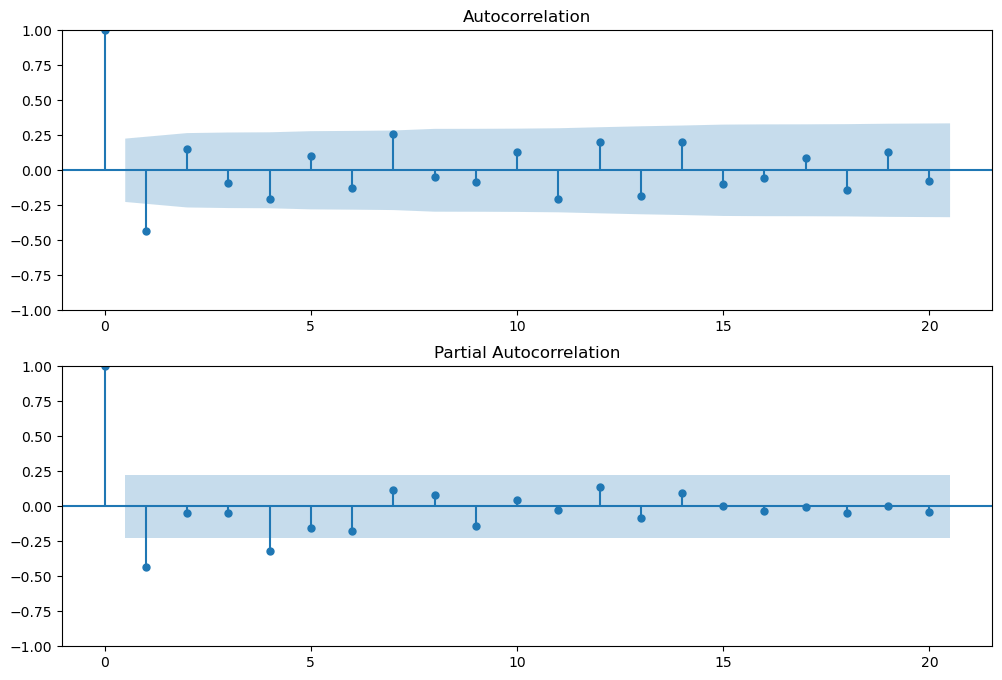

In [59]:
sdl_jnj_in = dl_jnj[4:79] - dl_jnj[:75]   
sdl_jnj_in = pd.Series(sdl_jnj_in,index=pd.date_range('4/1/1961',freq = 'Q', periods=T_in - 5))
sdl_jnj_in.plot()
    
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sdl_jnj_in, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sdl_jnj_in, lags=20, ax=ax2, method='ywm')

In [37]:
#===========================================================================
# Ljung-Box test to check whether my time series is a White Noise
#===========================================================================

n_autocor = 5
sm.stats.diagnostic.acorr_ljungbox(sdl_jnj_in, lags=[n_autocor])

,lb_stat,lb_pvalue
5,21.488597,0.000655


In [43]:
#===========================================================================
# Function to identify and estimate ARMA model based on BIC
#===========================================================================

def Find_BestSpec(df,p_max=12):
    ar_order = list(range(0,p_max+1)) #je fais débuter à 1 sinon white noise et pas de forecast
    d_order = [0]
    ma_order = list(range(0,p_max+1))
    arma_res = [list(orders) for orders in product(ar_order, d_order, ma_order)]
    #     pprint.pprint(arma_res)

    # sm.tsa.arima.model.ARIMA
    for order in arma_res:
        print('fitting: ar:{} -d:{} - ma:{}'.format(*order)) 
        try:
            arma_model = sm.tsa.arima.ARIMA(df, trend='c', order=order).fit()
            order.extend([arma_model.aic / 1e3, arma_model.bic / 1e3])
        except Exception as exception:
            print(exception.__str__())
            order.extend([np.NaN, np.NaN])
    
    res = pd.DataFrame(arma_res, columns = ['ar_order', 'd_order', 'ma_order', 'aic', 'bic'])
    print('criterion\n', res)
    # Select rows with the minimum AIC value
    min_bic_row = res[res['bic'] == res['bic'].min()]
#     print('Min BIC\n', min_bic_row)
    return min_bic_row

def Estim_BestSpec(df,p_opt):
    arma_model  = sm.tsa.arima.ARIMA(df, trend='c', order=(p_opt,0,0)).fit()
    forecast = arma_model.forecast(1)
#     print(arma_model.summary())
    return(forecast)

In [40]:
help(sm.tsa.arima.ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima.model:

class ARIMA(statsmodels.tsa.statespace.sarimax.SARIMAX)
 |  ARIMA(endog, exog=None, order=(0, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, enforce_stationarity=True, enforce_invertibility=True, concentrate_scale=False, trend_offset=1, dates=None, freq=None, missing='none', validate_specification=True)
 |  
 |  Autoregressive Integrated Moving Average (ARIMA) model, and extensions
 |  
 |  This model is the basic interface for ARIMA-type models, including those
 |  with exogenous regressors and those with seasonal components. The most
 |  general form of the model is SARIMAX(p, d, q)x(P, D, Q, s). It also allows
 |  all specialized cases, including
 |  
 |  - autoregressive models: AR(p)
 |  - moving average models: MA(q)
 |  - mixed autoregressive moving average models: ARMA(p, q)
 |  - integration models: ARIMA(p, d, q)
 |  - seasonal models: SARIMA(P, D, Q, s)
 |  - regression with errors that follow one of the above ARIM

In [44]:
Find_BestSpec(sdl_jnj_in,5)

fitting: ar:0 -d:0 - ma:0
fitting: ar:0 -d:0 - ma:1
fitting: ar:0 -d:0 - ma:2
fitting: ar:0 -d:0 - ma:3
fitting: ar:0 -d:0 - ma:4
fitting: ar:0 -d:0 - ma:5


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fitting: ar:1 -d:0 - ma:0
fitting: ar:1 -d:0 - ma:1
fitting: ar:1 -d:0 - ma:2


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fitting: ar:1 -d:0 - ma:3


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fitting: ar:1 -d:0 - ma:4


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fitting: ar:1 -d:0 - ma:5


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


fitting: ar:2 -d:0 - ma:0
fitting: ar:2 -d:0 - ma:1


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fitting: ar:2 -d:0 - ma:2


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fitting: ar:2 -d:0 - ma:3


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fitting: ar:2 -d:0 - ma:4


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fitting: ar:2 -d:0 - ma:5


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fitting: ar:3 -d:0 - ma:0
fitting: ar:3 -d:0 - ma:1


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


fitting: ar:3 -d:0 - ma:2


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fitting: ar:3 -d:0 - ma:3


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fitting: ar:3 -d:0 - ma:4


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fitting: ar:3 -d:0 - ma:5


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fitting: ar:4 -d:0 - ma:0
fitting: ar:4 -d:0 - ma:1


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


fitting: ar:4 -d:0 - ma:2


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fitting: ar:4 -d:0 - ma:3


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fitting: ar:4 -d:0 - ma:4


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fitting: ar:4 -d:0 - ma:5


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fitting: ar:5 -d:0 - ma:0
fitting: ar:5 -d:0 - ma:1


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fitting: ar:5 -d:0 - ma:2


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fitting: ar:5 -d:0 - ma:3


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fitting: ar:5 -d:0 - ma:4


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


fitting: ar:5 -d:0 - ma:5
criterion
     ar_order  d_order  ma_order       aic       bic
0          0        0         0 -0.112592 -0.107957
1          0        0         1 -0.132752 -0.125799
2          0        0         2 -0.132172 -0.122902
3          0        0         3 -0.135875 -0.124287
4          0        0         4 -0.134703 -0.120798
5          0        0         5 -0.133428 -0.117206
6          1        0         0 -0.127389 -0.120436
7          1        0         1 -0.133017 -0.123747
8          1        0         2 -0.131923 -0.120336
9          1        0         3 -0.134135 -0.120230
10         1        0         4 -0.133015 -0.116793
11         1        0         5 -0.130982 -0.112442
12         2        0         0 -0.125675 -0.116405
13         2        0         1 -0.133338 -0.121750
14         2        0         2 -0.131570 -0.117665
15         2        0         3 -0.134383 -0.118160
16         2        0         4 -0.131057 -0.112517
17         2        0      

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,ar_order,d_order,ma_order,aic,bic
1,0,0,1,-0.132752,-0.125799


In [60]:
arma_model = sm.tsa.arima.ARIMA(sdl_jnj_in, order=(0,0,1)).fit()
# arma_model
print(arma_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   75
Model:                 ARIMA(0, 0, 1)   Log Likelihood                  69.376
Date:                Thu, 24 Oct 2024   AIC                           -132.752
Time:                        15:05:49   BIC                           -125.799
Sample:                    06-30-1961   HQIC                          -129.976
                         - 12-31-1979                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.003      0.451      0.652      -0.004       0.007
ma.L1         -0.7700      0.090     -8.588      0.000      -0.946      -0.594
sigma2         0.0091      0.002      5.332      0.0

In [49]:
n_autocor = 1
sm.stats.diagnostic.acorr_ljungbox(arma_model.resid, lags=[n_autocor])

,lb_stat,lb_pvalue
1,2.497312,0.114041


In [50]:
n_autocor = 5
sm.stats.diagnostic.acorr_ljungbox(arma_model.resid, lags=[n_autocor])

,lb_stat,lb_pvalue
5,10.460402,0.063193


In [75]:
idx = pd.date_range('3/31/1980',freq = 'Q', periods=4)
arma_model  = tsa.ARIMA(sdl_jnj_in, order=[0,0,1]).fit()
arma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   75
Model:                 ARIMA(0, 0, 1)   Log Likelihood                  69.376
Date:                Thu, 24 Oct 2024   AIC                           -132.752
Time:                        15:14:16   BIC                           -125.799
Sample:                    06-30-1961   HQIC                          -129.976
                         - 12-31-1979                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.003      0.451      0.652      -0.004       0.007
ma.L1         -0.7700      0.090     -8.588      0.000      -0.946      -0.594
sigma2         0.0091      0.002      5.332      0.000       0.006       0.012
===================================================================================
Ljung-Box (L1) (Q):                   2.25   Jarque-Bera (JB):                 0.82
Prob(Q):                              0.13   Prob(JB):                         0.66
Heteroskedasticity (H):               0.55   Skew:                             0.09
Prob(H) (two-sided):                  0.15   Kurtosis:                         2.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
arma_model.resid

1961-06-30    0.241539
1961-09-30    0.103683
1961-12-31    0.208168
1962-03-31    0.086176
1962-06-30    0.005419
                ...   
1978-12-31   -0.172092
1979-03-31    0.012904
1979-06-30   -0.086384
1979-09-30    0.060947
1979-12-31   -0.040573
Freq: Q-DEC, Length: 75, dtype: float64

In [77]:
acf_coef = sm.tsa.stattools.acf(arma_model.resid, nlags=20)
temp_acf_coef = acf_coef[1:acf_coef.shape[0]]
lb, lb_p = sm.tsa.stattools.q_stat(temp_acf_coef, arma_model.resid.size)

In [78]:
lb

array([ 2.49731237,  4.5361587 ,  5.5574464 , 10.24767529, 10.46040168,
       10.48602541, 15.04352713, 15.30760132, 15.39707117, 15.51496843,
       16.88845101, 17.48138526, 17.82095038, 18.99326755, 19.30635929,
       19.67917299, 19.67918531, 20.35665812, 20.76719137, 20.77774706])

In [79]:
lb_p

array([0.11404077, 0.1035108 , 0.13524278, 0.03645602, 0.06319277,
       0.10562075, 0.03544548, 0.05343318, 0.08059076, 0.11438442,
       0.11121876, 0.13236869, 0.16443697, 0.16520665, 0.20018534,
       0.23501938, 0.29096637, 0.31310207, 0.34980619, 0.41031651])

In [80]:
arma_model.forecast(steps=4)

1980-03-31    0.032478
1980-06-30    0.001239
1980-09-30    0.001239
1980-12-31    0.001239
Freq: Q-DEC, Name: predicted_mean, dtype: float64

2.301584592660462


<Axes: >

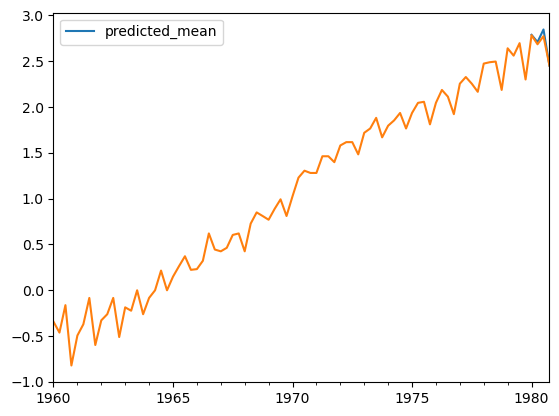

In [81]:
forecast = arma_model.forecast(steps=4)

dl_jnj_fc = dl_jnj[75:79] + forecast[0:4]
    
print(l_jnj[79])
l_jnj_fc = l_jnj[79] + dl_jnj_fc.cumsum()
l_jnj_fc = pd.DataFrame(l_jnj_fc, index=idx)    
    
l_jnj_fc.plot()
l_jnj.plot()  

In [79]:
l_jnj_fc

,predicted_mean
1980-03-31,2.808051
1980-06-30,2.708393
1980-09-30,2.825455
1980-12-31,2.451395


In [68]:
pd.DataFrame(l_jnj[-4:])

,0
1980-03-31,2.785011
1980-06-30,2.685805
1980-09-30,2.773838
1980-12-31,2.451867


In [78]:
pd.DataFrame(l_jnj[-4:])[0]-l_jnj_fc['predicted_mean']

1980-03-31   -0.023040
1980-06-30   -0.022588
1980-09-30   -0.051617
1980-12-31    0.000471
Freq: Q-DEC, dtype: float64

In [80]:
RMSE = np.sqrt(((pd.DataFrame(l_jnj[-4:])[0]-l_jnj_fc['predicted_mean'])**2).mean())*100
RMSE

3.0436705569375566

In [92]:
arma_model = sm.tsa.arima.ARIMA(l_jnj_in, order=(0,1,1), seasonal_order=(1,0,0,4)).fit()
# arma_model
print(arma_model.summary())

                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                   79
Model:             ARIMA(0, 1, 1)x(1, 0, [], 4)   Log Likelihood                  73.368
Date:                          Thu, 24 Oct 2024   AIC                           -140.735
Time:                                  15:33:40   BIC                           -133.665
Sample:                              06-30-1960   HQIC                          -137.905
                                   - 12-31-1979                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7322      0.078     -9.405      0.000      -0.885      -0.580
ar.S.L4        0.9253      0.037     25.043      0.

In [70]:
acf_coef = sm.tsa.stattools.acf(arma_model.resid, nlags=20)
temp_acf_coef = acf_coef[1:acf_coef.shape[0]]
lb, lb_p = sm.tsa.stattools.q_stat(temp_acf_coef, arma_model.resid.size)
print(lb)
print(lb_p)

[ 0.46529747  0.81426209  1.38069887  4.3715991   4.49409164  4.49672161
  7.10133475  7.23015211  7.34862185  7.40109392  9.17067999  9.21571018
  9.4945748   9.88471571 10.75899217 11.62871819 11.82918199 12.70648375
 13.19398789 13.20658241]
[0.49515855 0.66555697 0.71006519 0.35804512 0.48067434 0.60977663
 0.41840581 0.51201696 0.60087216 0.68711376 0.60614123 0.68440384
 0.73464972 0.77056254 0.76948439 0.76911859 0.8103687  0.80870649
 0.82849383 0.86834554]


In [85]:
arma_model.forecast(steps=4)

1980-03-31    0.456737
1980-06-30   -0.063433
1980-09-30    0.121396
1980-12-31   -0.333931
Freq: Q-DEC, Name: predicted_mean, dtype: float64

<Axes: >

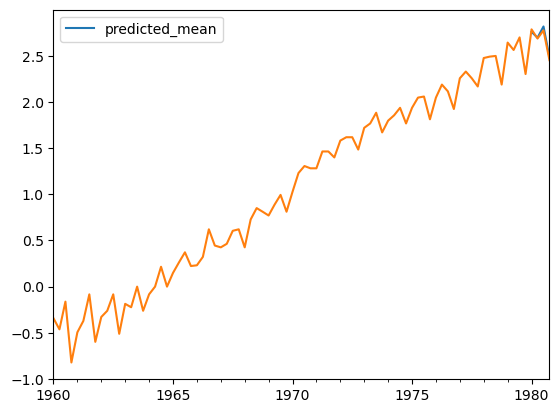

In [86]:
dl_jnj_fc = arma_model.forecast(steps=4)
    
l_jnj_fc = l_jnj[79] + dl_jnj_fc.cumsum()
l_jnj_fc = pd.DataFrame(l_jnj_fc, index=idx)    
    
l_jnj_fc.plot()
l_jnj.plot()  

In [87]:
RMSE = np.sqrt(((pd.DataFrame(l_jnj[-4:])[0]-l_jnj_fc['predicted_mean'])**2).mean())*100
RMSE

2.9690351692842727

In [103]:
# arma_model = sm.tsa.arima.ARIMA(l_jnj_in, order=(0,1,1), seasonal_order=(1,0,0,4)).fit()
arma_model = sm.tsa.arima.ARIMA(l_jnj_in, order=([4],1,1)).fit()

# arma_model
print(arma_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   79
Model:               ARIMA([4], 1, 1)   Log Likelihood                  73.368
Date:                Thu, 24 Oct 2024   AIC                           -140.735
Time:                        15:40:48   BIC                           -133.665
Sample:                    06-30-1960   HQIC                          -137.905
                         - 12-31-1979                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L4          0.9253      0.037     25.041      0.000       0.853       0.998
ma.L1         -0.7322      0.078     -9.404      0.000      -0.885      -0.580
sigma2         0.0081      0.002      5.342      0.0

<Axes: >

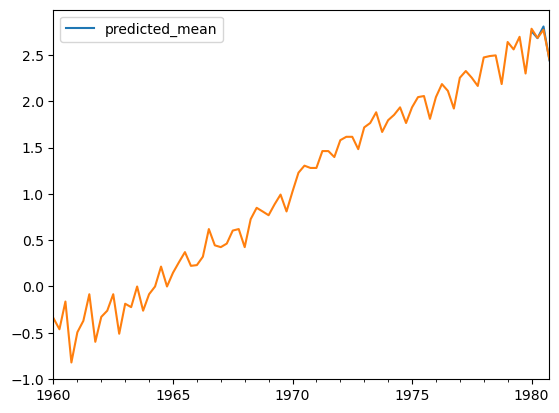

In [104]:
l_jnj_fc = arma_model.forecast(steps=4)
    
l_jnj_fc = pd.DataFrame(l_jnj_fc, index=idx)    
    
l_jnj_fc.plot()
l_jnj.plot()  

In [105]:
RMSE = np.sqrt(((pd.DataFrame(l_jnj[-4:])[0]-l_jnj_fc['predicted_mean'])**2).mean())*100
RMSE

2.2976221349512307

## fdx_earnings

1991-03-31    0.122218
1991-06-30   -0.072571
1991-09-30    0.157004
1991-12-31    0.048790
1992-03-31    0.157004
                ...   
2005-03-31    0.928219
2005-06-30    0.867100
2005-09-30    1.036737
2005-12-31    0.928219
2006-03-31    1.061257
Freq: Q-DEC, Length: 61, dtype: float64


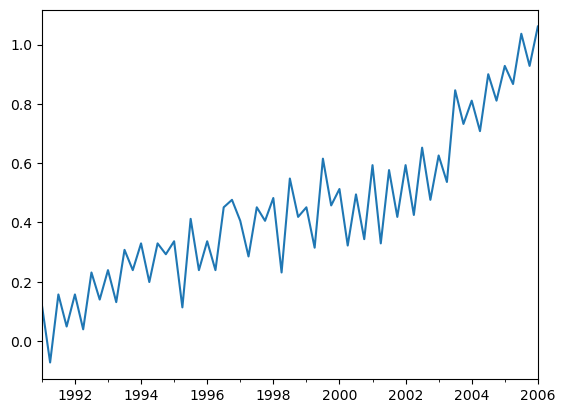

In [152]:
#===========================================================================
# load data fdx_earnings.mat
#===========================================================================

file_name   = path + '/fdx_earnings.mat'
data = sio.loadmat(file_name)
T=61
T_in = 57
fdx=  1 + pd.Series(np.ravel(data['q_eps_fdx']),index=pd.date_range('1/1/1991',freq = 'Q', periods=T))
    
l_fdx = fdx.apply(np.log)
l_fdx.plot()
print(l_fdx)

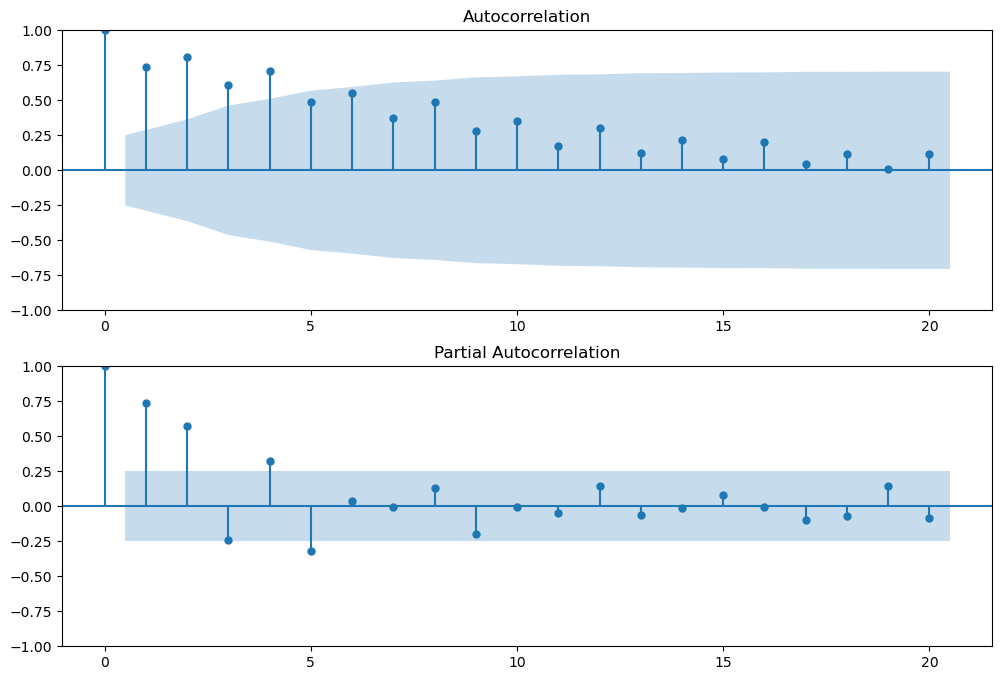

In [147]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(l_fdx, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(l_fdx, lags=20, ax=ax2, method='ywm')   

In [148]:
sm.tsa.stattools.adfuller(l_fdx, regression='ct', autolag='BIC', store=False, regresults=True)

(0.38173981189335415,
 0.9965620200029065,
 {'1%': -4.127070491379263,
  '5%': -3.490540734099021,
  '10%': -3.173740314428731},
 <statsmodels.stats.diagnostic.ResultsStore at 0x2147a6751e0>)

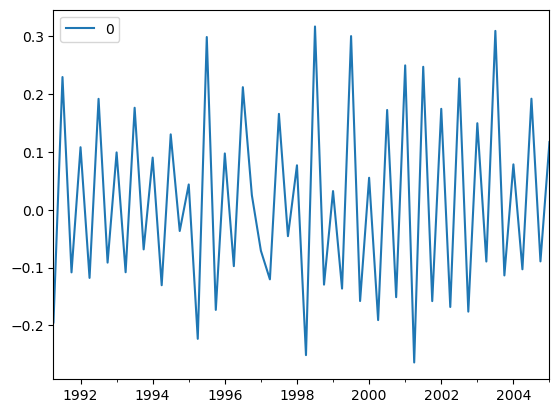

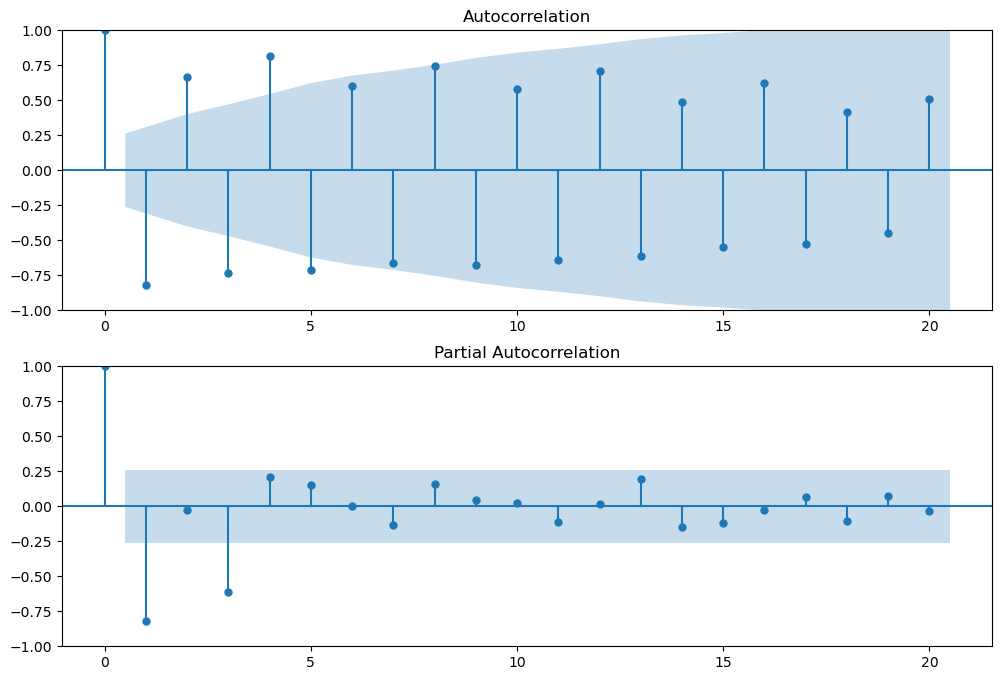

In [157]:
l_fdx = pd.DataFrame(l_fdx)
dl_fdx = l_fdx.diff().dropna()

dl_fdx_in = dl_fdx[:T_in-1]
dl_fdx_in.plot()
    
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dl_fdx_in, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dl_fdx_in, lags=20, ax=ax2, method='ywm')

In [158]:
sm.tsa.stattools.adfuller(dl_fdx_in, regression='c', autolag='BIC', store=False, regresults=True)

(-11.10987319290931,
 3.682967569359221e-20,
 {'1%': -3.560242358792829,
  '5%': -2.9178502070837,
  '10%': -2.5967964150943397},
 <statsmodels.stats.diagnostic.ResultsStore at 0x2147bd7a590>)

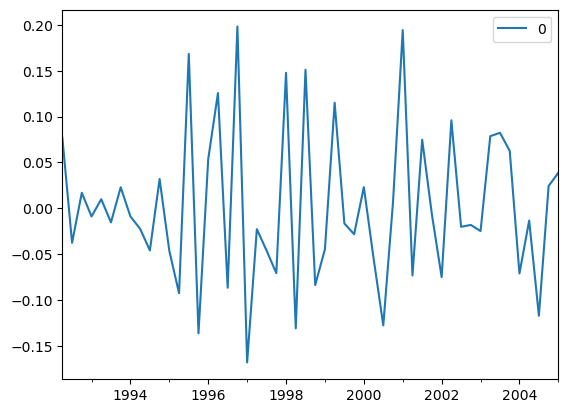

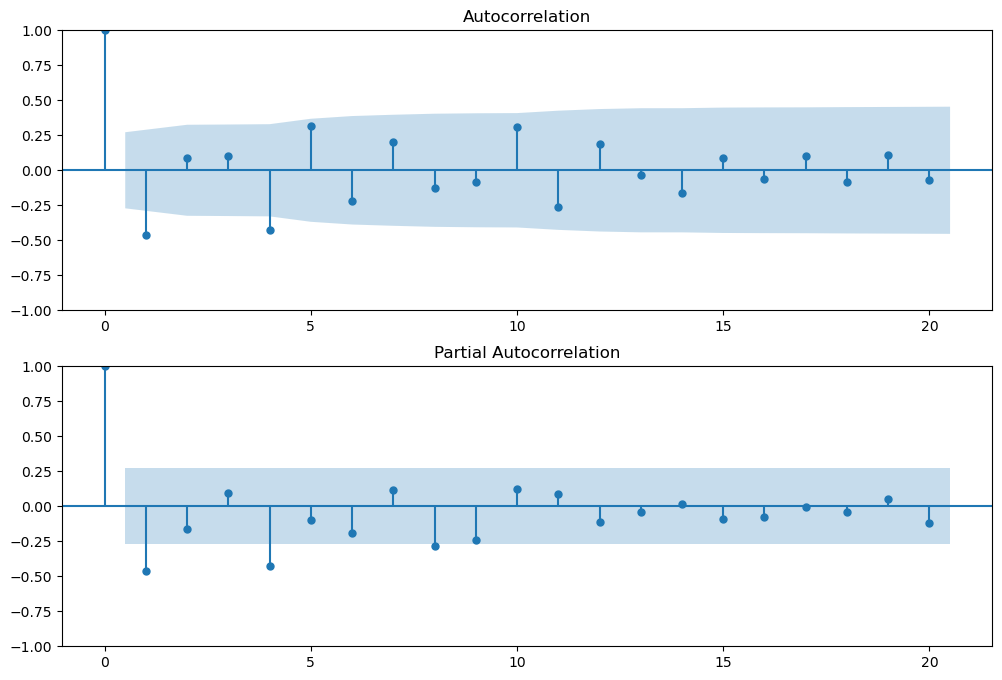

In [177]:
sdl_fdx_in = dl_fdx_in.diff(4,axis=0).dropna()
sdl_fdx_in.plot()
    
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sdl_fdx_in, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sdl_fdx_in, lags=20, ax=ax2, method='ywm')

In [178]:
print(sdl_fdx_in)

                   0
1992-06-30  0.077005
1992-09-30 -0.037683
1992-12-31  0.016864
1993-03-31 -0.008959
1993-06-30  0.009794
1993-09-30 -0.015435
1993-12-31  0.022882
1994-03-31 -0.008968
1994-06-30 -0.022464
1994-09-30 -0.046004
1994-12-31  0.031834
1995-03-31 -0.046484
1995-06-30 -0.092691
1995-09-30  0.168328
1995-12-31 -0.136459
1996-03-31  0.053653
1996-06-30  0.125688
1996-09-30 -0.086722
1996-12-31  0.198251
1997-03-31 -0.168224
1997-06-30 -0.022831
1997-09-30 -0.046162
1997-12-31 -0.070769
1998-03-31  0.147730
1998-06-30 -0.131028
1998-09-30  0.151113
1998-12-31 -0.083801
1999-03-31 -0.044596
1999-06-30  0.115050
1999-09-30 -0.016635
1999-12-31 -0.028350
2000-03-31  0.023033
2000-06-30 -0.054475
2000-09-30 -0.127762
2000-12-31  0.006654
2001-03-31  0.194338
2001-06-30 -0.073283
2001-09-30  0.074697
2001-12-31 -0.006796
2002-03-31 -0.075121
2002-06-30  0.095964
2002-09-30 -0.020252
2002-12-31 -0.018188
2003-03-31 -0.024912
2003-06-30  0.078614
2003-09-30  0.082317
2003-12-31  0

In [179]:
idx = pd.date_range('6/30/2005',freq = 'Q', periods=4)
arma_model  = sm.tsa.arima.ARIMA(sdl_fdx_in, order=[0,0,1] ).fit()
arma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      0   No. Observations:                   52
Model:                 ARIMA(0, 0, 1)   Log Likelihood                  61.976
Date:                Thu, 26 Oct 2023   AIC                           -117.953
Time:                        18:41:38   BIC                           -112.099
Sample:                    06-30-1992   HQIC                          -115.708
                         - 03-31-2005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.003      0.281      0.779      -0.005       0.007
ma.L1         -0.6957      0.097     -7.162      0.000      -0.886      -0.505
sigma2         0.0053      0.001      4.956      0.000       0.003       0.007
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                 0.35
Prob(Q):                              0.52   Prob(JB):                         0.84
Heteroskedasticity (H):               1.53   Skew:                             0.20
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

2005-06-30    0.001530
2005-09-30    0.000904
2005-12-31    0.000904
2006-03-31    0.000904
Freq: Q-DEC, Name: predicted_mean, dtype: float64
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
0.928219302739429
            forecast
2005-06-30  0.826855
2005-09-30  1.019884
2005-12-31  0.931556
2006-03-31  1.049749


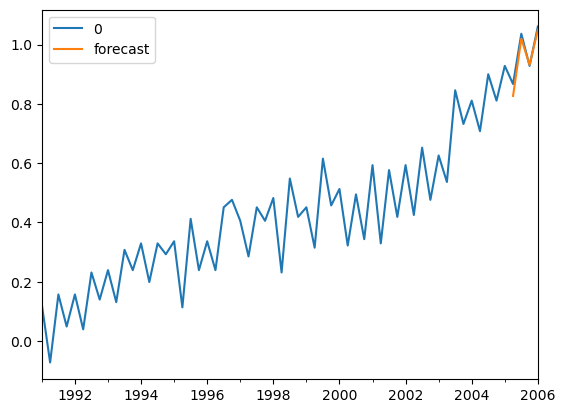

In [262]:
forecast = arma_model.forecast(steps = 4)
print(forecast)
print(type(forecast))
print(type(dl_fdx))
dl_fdx_fc = np.array(dl_fdx[52:56]) + np.array(forecast[0:4])
dl_fdx_fc = pd.DataFrame(dl_fdx_fc, index=idx)
dl_fdx_fc

print(l_fdx.iloc[56])
l_fdx_fc = np.array(l_fdx.iloc[56]) + np.array(dl_fdx_fc.cumsum())
l_fdx_fc = pd.DataFrame(l_fdx_fc, index=idx)    
l_fdx_fc = l_fdx_fc

l_fdx_fc.rename(columns={l_fdx_fc.columns[0]: "forecast"}, inplace=True)
l_fdx_fc

temp = pd.concat([l_fdx, l_fdx_fc], axis=1)
temp.plot()

print(l_fdx_fc)